# Script for data analysis
## the first part is just initialization


In [1]:
%pylab inline
import itertools
import sys
import os
from PyQt4 import QtCore, QtGui
app = QtGui.QApplication(sys.argv)
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


In [2]:
#selecting veda_path_location
veda_path_location = str(QtGui.QFileDialog.getExistingDirectory(caption='Select python package dir'))
sys.path.insert(0,veda_path_location)

In [3]:
#selecting data_path_location
data_path_location = str(QtGui.QFileDialog.getExistingDirectory())
sys.path.insert(0,veda_path_location)

The next cell initializes the `veda_eeg` package. If this **fails** you don't have the right path set for the package  

In [4]:
import veda_eeg.io.io_veda as io #import the io module
import veda_eeg.analysis.spectral as sp #spectral functions
import veda_eeg.analysis.plots as pl #plotting utilities`
#change the root folder to the location that contains the EEG data
io.DATA_ROOT_FOLDER = data_path_location
hnd = io.logger.handlers[1]
hnd.setLevel('INFO')

In [5]:
# finding the data path
folder_list = io.find_sessions()
# setting the folder to analyze
session_to_analyze = folder_list[0]
print('`session_to_analyze`: {}'.format(session_to_analyze))

Found 7 sessions                                                                 |INFO: 2016-08-30 16:33:53,917|
`session_to_analyze`: \\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT02_2016-7-29_MOD_Cumul_1-56_0.5_30_30_iv


In [6]:
data = io.import_session(session_to_analyze,save=True)

Found 1 sessions                                                                 |INFO: 2016-08-30 16:33:55,783|
Processing Session:RAT02_2016-7-29_MOD_Cumul_1-56_0.5_30_30_iv                   |INFO: 2016-08-30 16:33:55,785|
Found session txt file                                                           |INFO: 2016-08-30 16:33:55,789|
Importing intan files                                                            |INFO: 2016-08-30 16:33:55,806|
Extracting only [1, 3, 5, 7, 24, 26, 28, 30] chip_channels-WARNING:io_veda:line 290-import_session_intan()
Warning file ended prematurely
Warning file ended prematurely
Saving data                                                                      |INFO: 2016-08-30 16:35:25,667|
data saved in: \\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT02_2016-7-29_MOD_Cu |INFO: 2016-08-30 16:37:11,262|


In [14]:
#this is to import a previously imported session
#imported_data_file_location = str(QtGui.QFileDialog.getOpenFileName(caption='Select gz dill file'))
#data = io.load_session(imported_data_file_location)

# Data plotting
## First cell is creating the figure

## second is saving the cell

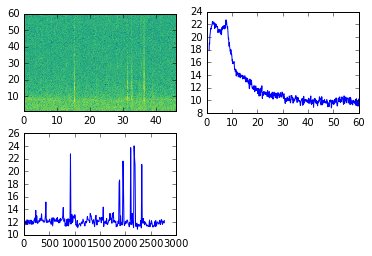

In [26]:
#plotting spectrogram
pl.plot_spectrogram(data)
fig = gcf()

In [28]:
# save figure
# uncomment next lines to save with a given filename
# file_location = str(QtGui.QFileDialog.getSaveFileName(caption='Save file to'))
# fig.savefig(file_location + '.pdf')

#save in the current directory: use `pwd`
fig.savefig('test.pdf')

# Now saves the data in a pandas dataframe

In [7]:
#this is a list
df_psd, df_acc = sp.spectra_analysis_df(data, window=300)


In [8]:
df_psd['Frequency_red'] = ((df_psd.reset_index().Frequency.values*2).round(0)/2.)
df_psd_red = df_psd.reset_index().set_index(['Channel','Frequency_red','Time'])
df_to_save = df_psd_red.groupby(level=['Channel','Time','Frequency_red']).mean()

In [9]:
#save results, make sure session_to_analyze is defined
# uncomment next lines to save with a given filename
file_location = str(QtGui.QFileDialog.getSaveFileName(caption='Save file to'))
df_to_save.to_csv(file_location)

# file_location = os.path.join(session_to_analyze,'PSD.csv')
# df_to_save.to_csv(file_location)

In [14]:
df_acc

,acc_modulus,timeinterval,baseline,route,drug,doseinterval,original_data_format,experiment,date,session_name,subject,session_path,d0,d1
Time,,,,,,,,,,,,,,
150.0,2.944413,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
449.5,2.955548,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
749.0,2.975402,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
1048.5,2.927941,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
1348.0,2.976193,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
1647.5,3.018685,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
1947.0,2.781066,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
2246.5,2.772411,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
2546.0,2.846721,30,30,iv,MOD,0.5,INTAN,Cumul,2016-7-29,RAT02_2016-7-29_MOD_Cumul_1_32_0.5_30_30_iv,RAT02,\\nida-sectionfs\MDP\Common\EEG data\RAT02\RAT...,1,32
